Use this notebook to open up and examine the datasets. Main use is to crop out the relevent recording portion.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [47]:
folder = './20230809_163741/'

In [48]:
imu = pd.read_csv(f'{folder}imu.csv', header=0, index_col=0)
imu.head()

,a_z,a_y,a_x,w_z,w_y,w_x
time,,,,,,
2023-08-09 12:37:41-04:00,0.317348,9.771010,-0.241811,-0.001062,-0.003228,0.005956
2023-08-09 12:37:42-04:00,0.298291,9.771711,-0.234048,0.000275,0.000109,-0.000665
2023-08-09 12:37:43-04:00,0.301898,9.772385,-0.229722,0.000036,-0.000058,0.000158
2023-08-09 12:37:44-04:00,0.278849,9.773858,-0.228483,0.001265,0.004715,-0.008969
2023-08-09 12:37:45-04:00,0.247988,9.766124,-0.223440,-0.000548,-0.004399,0.008718


Note: the above does not set the datatype. PyPlot infers the numerical values, but the index is still treated like a string.

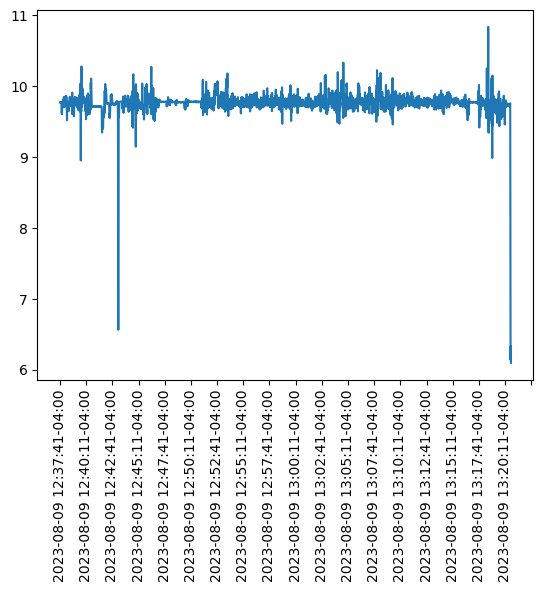

In [49]:
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots()
ax.plot(imu.index, imu['a_y'])
#ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _:pd.to_datetime(x).strftime(date_format)))
ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=90)
plt.show()

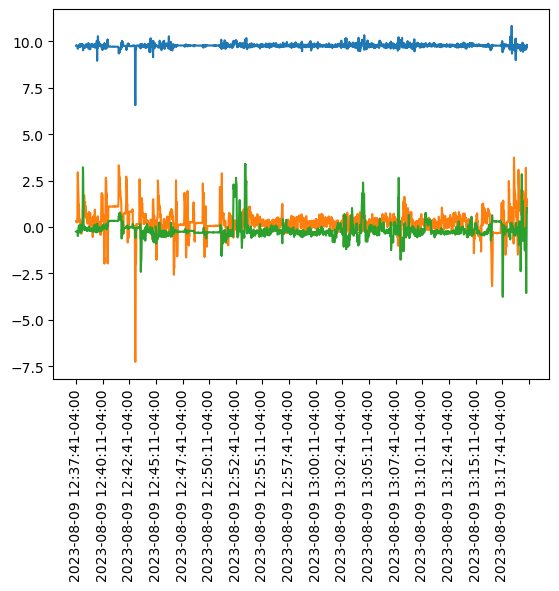

In [53]:
time = '2023-08-09 13:20:00-04:00'
imu2 = imu[imu.index <= time]
fig, ax = plt.subplots()
ax.plot(imu2.index, imu2['a_y'], imu2.index, imu2['a_z'], imu2.index, imu2['a_x'])
ax.xaxis.set_major_locator(MaxNLocator(nbins=20))
plt.xticks(rotation=90)
plt.show()

In [54]:
imu2.to_csv(f'{folder}imu.csv')
bar = pd.read_csv(f'{folder}barometer.csv', header=0, index_col=0)
bar = bar[bar.index <= time]
bar.to_csv(f'{folder}barometer.csv')

gps = pd.read_csv(f'{folder}gps.csv', header=0, index_col=0)
gps = gps[gps.index <= time]
gps.to_csv(f'{folder}gps.csv')

mag = pd.read_csv(f'{folder}magnetometer.csv', header=0, index_col=0)
mag = mag[mag.index <= time]
mag.to_csv(f'{folder}magnetometer.csv')